![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [68]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [69]:
# Dealing with categorical features
penguins_df_dummies = pd.get_dummies(penguins_df['sex'], drop_first=True)
penguins_df_dummies = pd.concat([penguins_df, penguins_df_dummies], axis=1)

# Remove original categorical column
penguins_df_dummies = penguins_df_dummies.drop('sex', axis=1)

penguins_df_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


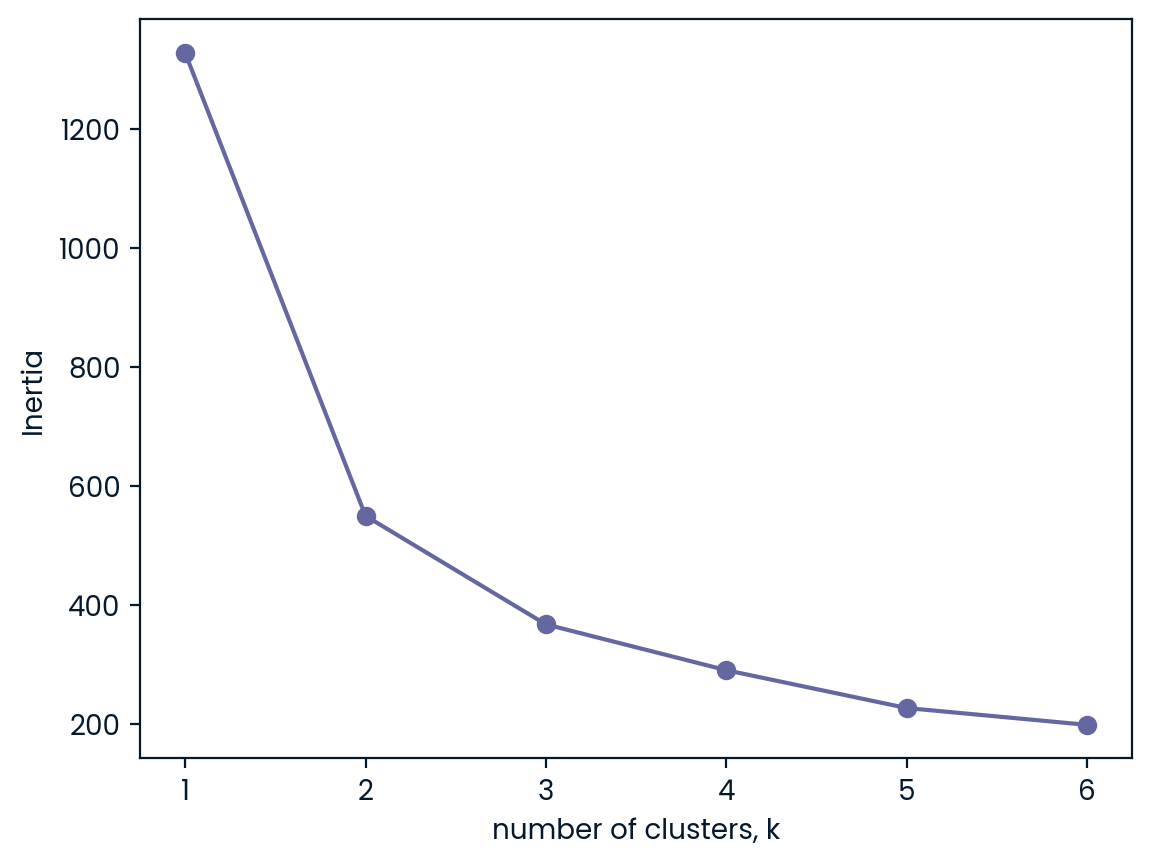

In [70]:
# Scale your dataset

scaler = StandardScaler()
scaler.fit(penguins_df_new)
samples_scaled = scaler.transform(penguins_df_new)

# What cluster number to choose

ks = range(1,7)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(samples_scaled)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()
    

In [71]:
# New model with cluster number 3

new_model = KMeans(n_clusters=3)
new_model.fit(samples_scaled)

KMeans(n_clusters=3)

In [72]:
# List of numeric columns in the dataset
num_cols = list(penguins_df.describe().columns)

In [73]:
num_cols

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [74]:
# Get the labels for the dataset
label = new_model.predict(samples_scaled)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [75]:
# Add the label column to the dataset
penguins_df['label'] = labels
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
3,36.7,19.3,193.0,3450.0,FEMALE,1
4,39.3,20.6,190.0,3650.0,MALE,1


In [76]:
# Groupby label and calculate the mean of all numeric columns
stat_penguins = penguins_df.groupby('label')[num_cols].mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,47.568067,14.996639,217.235294,5092.436975
1,38.305469,18.098437,188.554688,3587.500000
2,47.662353,18.748235,196.917647,3898.235294
